In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Training Models

#### Generate linear-looking data to test models

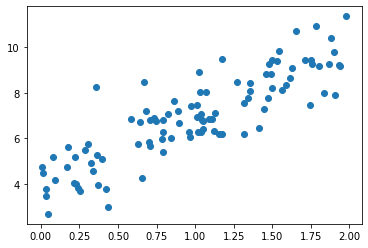

In [5]:
#Generate linear-looking data
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

plt.scatter(X,y)

## Normal Equation (Linear regression)

In [6]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0382033 ],
       [2.93178966]])

(Optimal values would have been theta_0=4 and theta_1=3)

#### Make predictions

In [7]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.0382033 ],
       [9.90178262]])

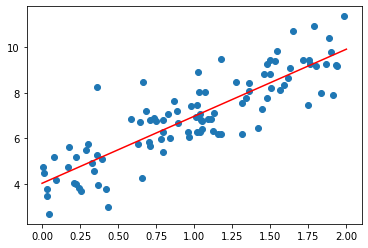

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.scatter(X,y)
plt.show()


### Performing linear regression using Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.0382033]), array([[2.93178966]]))

In [10]:
lin_reg.predict(X_new)

array([[4.0382033 ],
       [9.90178262]])

## Batch Gradient Descent

In [11]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

theta

array([[4.0382033 ],
       [2.93178966]])

## Stochastic Gradient Descent

In [12]:
n_epochs=50
t0, t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

theta

array([[4.03992384],
       [2.95092813]])

#### Performing stochastic GD with Scikit-Learn

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.94279284]), array([2.86898009]))

| Algorithm       | Large m | Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-Learn     |
|-----------------|---------|---------------------|---------|-------------|------------------|------------------|
| Normal Equation | Fast    | No                  | Slow    | 0           | No               | N/A              |
| SVD             | Fast    | No                  | Slow    | 0           | No               | LinearRegression |
| Batch GD        | Slow    | No                  | Fast    | 2           | Yes              | SGDRegressor     |
| Stochastic GD   | Fast    | Yes                 | Fast    | >=2         | Yes              | SGDRegressor     |
| Mini-batch GD   | Fast    | Yes                 | Fast    | >=2         | Yes              | SGDRegressor     |

## Polynomial Regression

#### Generate non-linear looking data

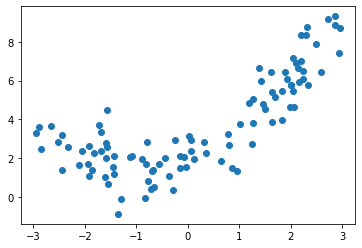

In [14]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

plt.scatter(X,y)

A sraight line will not fit this data so we have to transform the training data, adding the square of each feature.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([1.62032246])

In [16]:
X_poly[0]

array([1.62032246, 2.62544487])

X_poly contains the original feature and the transormed (squared) feature

In [17]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01441352]), array([[0.97095131, 0.50095519]]))

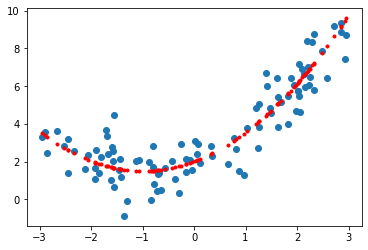

In [18]:
# 100 linearly spaced numbers
#x = np.linspace(-5,5,100)

# the function, which is y = x^2 here

y_pred = 0.520*X**2+1.025*X+2.01

plt.scatter(X,y)
plt.plot(X,y_pred, 'r.')
plt.show()

# Learning Curves

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.2)
    train_errors, val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.ylim(0, 3)

#### Learning curve of plain linear regression

it shows underfitting, adding more training example will not solve the problem. A more complex model or better features can help to decrease the error.

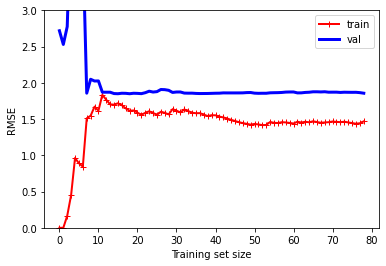

In [20]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

#### Learning curve of 10th-degree polynomial model

Errror is smaller, overfitting more likey than underfitting. Adding training data can improve the model.

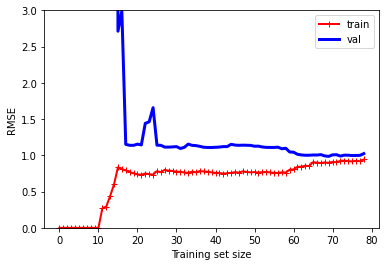

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models
## Ridge Regression

Closed form solution

In [22]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.10233208]])

SGD solution

In [23]:
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.09687324])

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (uses l1-norm)  

Tends to eliminate the weights of the least important features (set them to zero) and therefore automatically performs feature selection and outputs a sparse model

In [24]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.06190233])

which is the same as:

In [25]:
sgd_reg=SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.09188935])

## Elastic Net

Middle ground between Ridge Regression and Lasso Regression

In [26]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.06075993])

# Logistic Regression

In [27]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [36]:
X=iris['data'][:,3:] #petal width
y=(iris['target']==2).astype(int) # 1 if iris virginica, else 0

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

predict_proba() returns the probability value between 0 and 1 whereas predict() selects one class

Text(0, 0.5, 'Probability')

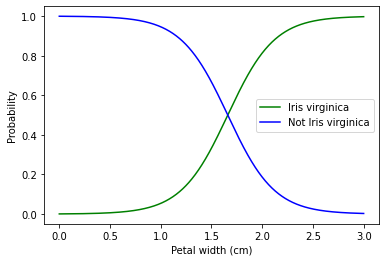

In [41]:
X_new=np.linspace(0,3,1000).reshape(-1,1) # create data with petal width of 0 to 3 cm
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b-', label='Not Iris virginica')
plt.legend()
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')

In [42]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## Softmax Regression

In [43]:
X=iris['data'][:,(2,3)] # petal length, petal width
y=iris['target']

softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [44]:
softmax_reg.predict([[5,2]])

array([2])

In [45]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])